In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import norm, probplot

from sklearn.preprocessing import MinMaxScaler, power_transform, normalize
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import make_pipeline
from sklearn.manifold import TSNE
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import pickle

In [2]:
df = pd.read_csv("creditcard.csv") 

## Exploration des données et compréhensions du dataset 

In [3]:
#visualization d'ensemble
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print(f"size of the dataset : {len(df)}")

size of the dataset : 284807


In [5]:
#Recherche de valeurs absentes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
# On constate aucune valeur absente dans le dataset
def print_na(col): 
    null = df[col].isnull().sum()
    print(f"Column {col} contains : {null} na values")
    print("-"*10)
    print()

for col in df.columns: 
    print_na(col)

Column Time contains : 0 na values
----------

Column V1 contains : 0 na values
----------

Column V2 contains : 0 na values
----------

Column V3 contains : 0 na values
----------

Column V4 contains : 0 na values
----------

Column V5 contains : 0 na values
----------

Column V6 contains : 0 na values
----------

Column V7 contains : 0 na values
----------

Column V8 contains : 0 na values
----------

Column V9 contains : 0 na values
----------

Column V10 contains : 0 na values
----------

Column V11 contains : 0 na values
----------

Column V12 contains : 0 na values
----------

Column V13 contains : 0 na values
----------

Column V14 contains : 0 na values
----------

Column V15 contains : 0 na values
----------

Column V16 contains : 0 na values
----------

Column V17 contains : 0 na values
----------

Column V18 contains : 0 na values
----------

Column V19 contains : 0 na values
----------

Column V20 contains : 0 na values
----------

Column V21 contains : 0 na values
--------

## Exploration : Echelle des données

In [7]:
# Time et Amount ne sont pas normalisées contrairement aux V1,V2, ... V3 
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Distribution d'Amount et Time 

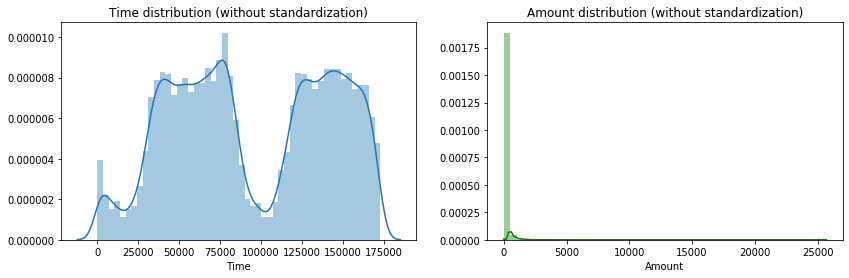

In [8]:
f, ax = plt.subplots(1,2, figsize=(14,4))
ax[0].set_title("Time distribution (without standardization)")
ax[1].set_title("Amount distribution (without standardization)")
sns.distplot(a=df["Time"], ax=ax[0])
sns.distplot(a=df["Amount"], ax=ax[1], color="g")

## Normalisation des variables Amount et Time  

### On observe que Time et Amount ne sont pas à la même échelle que les autres variables.On va donc utiliser MinMaxScaler pour remédier à cela


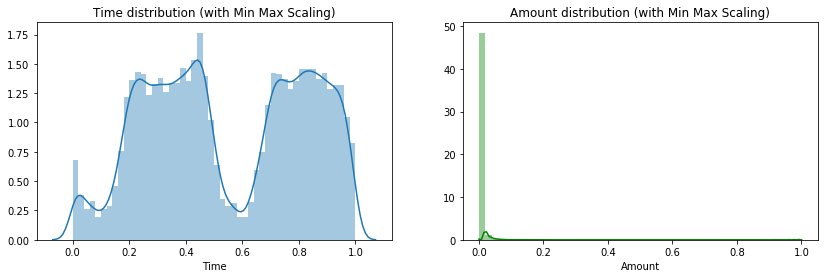

In [9]:
#Min Max scaling
scaler = MinMaxScaler()
scaled_time = scaler.fit_transform(df["Time"].values.reshape(-1,1))
scaled_amount = scaler.fit_transform(df["Amount"].values.reshape(-1,1))
#distribution

f, ax = plt.subplots(1,2, figsize=(14,4))
ax[0].set_title("Time distribution (with Min Max Scaling)")
ax[1].set_title("Amount distribution (with Min Max Scaling)")
ax[0].set_xlabel("Time")
ax[1].set_xlabel("Amount")
sns.distplot(a=scaled_time, ax=ax[0])
sns.distplot(a=scaled_amount, ax=ax[1], color="g")

#on remplace par les valeurs mises à l'échelle :
df["Time"] = scaled_time 
df["Amount"] = scaled_amount

## Observons maintenant à quel point notre Dataset est déséquilibré

In [10]:
non_fraud, fraud = df["Class"].value_counts(normalize=True).values

print(f"Frequency of Non Fraud transactions : {round(non_fraud * 100,2)} % ")
print("-"*5)
print(f"Frequency of Fraud transactions : {round(fraud * 100,2)} % ")
print("-"*5)

Frequency of Non Fraud transactions : 99.83 % 
-----
Frequency of Fraud transactions : 0.17 % 
-----


Text(0.5, 1.0, 'Barplot Class')

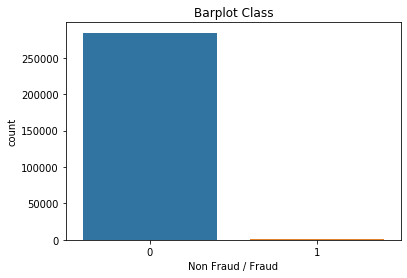

In [11]:
# Visualisons cela : 

ax = sns.countplot(data=df, x="Class")
ax.set_xlabel("Non Fraud / Fraud")
ax.set_title("Barplot Class")

### Conclusion de ce déséquilibre : On va devoir utiliser des méthodes de down sampling ou de upsampling pour palier ce problème. Nous y reviendrons

# Etudions la corrélation de nos variables 

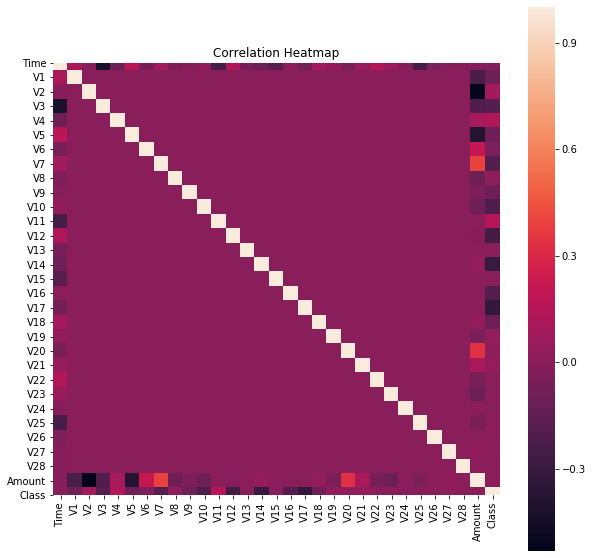

In [12]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=corr, square=True)
plt.title("Correlation Heatmap")
plt.show()

In [13]:
df =df.sample(frac=1)
X = df[[col for col in df.columns if col != "Class"]] 
y = df["Class"]

In [14]:
# pca pour visualisation 

X_small = X[["V14", "V2","V4","V11", "V10","V14","V16"]]
pca = PCA(n_components=2)
x_vis = pca.fit_transform(X_small) 

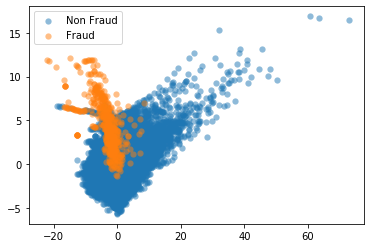

In [15]:
palette = sns.color_palette()
plt.scatter(x_vis[y==0, 0], x_vis[y==0, 1], label="Non Fraud", alpha=0.5, facecolor=palette[0], linewidth=0.15)
plt.scatter(x_vis[y==1, 0], x_vis[y==1, 1], label="Fraud", alpha=0.5, facecolor=palette[1], linewidth=0.15)
plt.legend()
plt.show()

In [16]:
#essayons différentes techniques de sampling
#undersampling

rand_under = RandomUnderSampler(random_state=42)
X_rand_under, y_rand_under = rand_under.fit_resample(X, y)

nearmiss = NearMiss()
X_nearmiss, y_nearmiss = nearmiss.fit_resample(X, y)

In [17]:
#modification de la taille 
print(f"Size after random_undersampling : {len(X_rand_under)}")
print(f"Size after nearmiss : {len(X_nearmiss)}")

Size after random_undersampling : 984
Size after nearmiss : 984


In [18]:
pca = PCA(n_components=2) 
X_reduced_ran = pca.fit_transform(X_rand_under)
X_reduced_near = pca.fit_transform(X_nearmiss)

In [19]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne_rand_under = tsne.fit_transform(X_rand_under)
X_tsne_near = tsne.fit_transform(X_nearmiss)

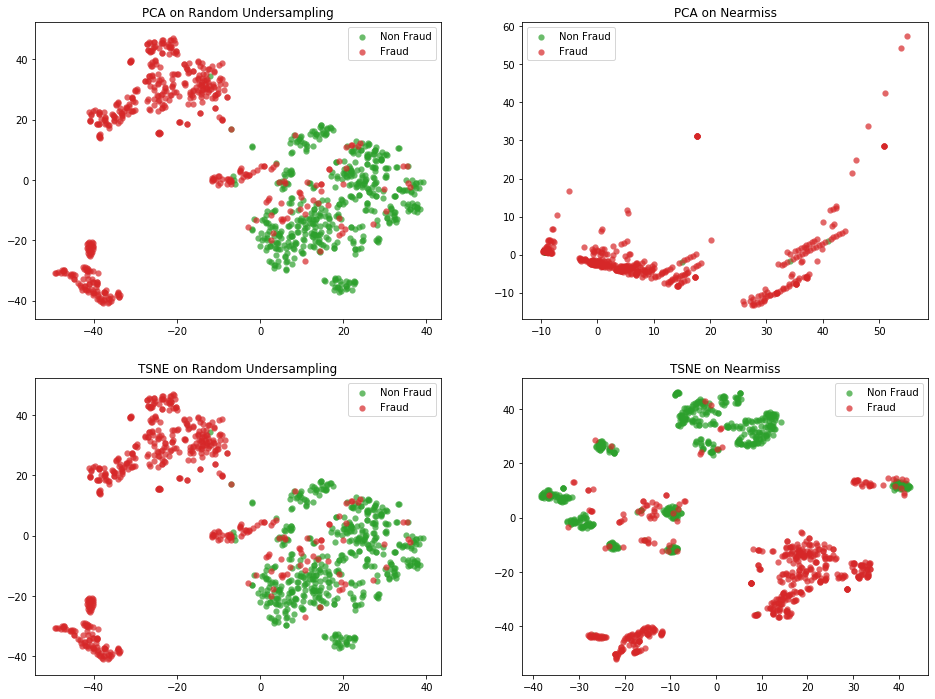

In [20]:
#visualisation 
palette = sns.color_palette()

f, ax = plt.subplots(2,2, figsize=(16,12))

#Random Undersampling
ax[0][0].set_title("PCA on Random Undersampling")
ax[0][0].scatter(X_tsne_rand_under[y_rand_under==0, 0], X_tsne_rand_under[y_rand_under==0, 1], label="Non Fraud", alpha=0.7, facecolor=palette[2], linewidth=0.15)
ax[0][0].scatter(X_tsne_rand_under[y_rand_under==1, 0], X_tsne_rand_under[y_rand_under==1, 1], label="Fraud", alpha=0.7, facecolor=palette[3], linewidth=0.15)
ax[0][0].legend()
#Nearmiss
ax[0][1].set_title("PCA on Nearmiss")
ax[0][1].scatter(X_reduced_near[y_nearmiss==0, 0], X_reduced_near[y_nearmiss==0, 1], label="Non Fraud", alpha=0.7, facecolor=palette[2], linewidth=0.15)
ax[0][1].scatter(X_reduced_near[y_nearmiss==1, 0], X_reduced_near[y_nearmiss==1, 1], label="Fraud", alpha=0.7, facecolor=palette[3], linewidth=0.15)
ax[0][1].legend()


ax[1][0].set_title("TSNE on Random Undersampling")
ax[1][0].scatter(X_tsne_rand_under[y_rand_under==0, 0], X_tsne_rand_under[y_rand_under==0, 1], label="Non Fraud", alpha=0.7, facecolor=palette[2], linewidth=0.15)
ax[1][0].scatter(X_tsne_rand_under[y_rand_under==1, 0], X_tsne_rand_under[y_rand_under==1, 1], label="Fraud", alpha=0.7, facecolor=palette[3], linewidth=0.15)
ax[1][0].legend()


ax[1][1].set_title("TSNE on Nearmiss")
ax[1][1].scatter(X_tsne_near[y_nearmiss==0, 0], X_tsne_near[y_nearmiss==0, 1], label="Non Fraud", alpha=0.7, facecolor=palette[2], linewidth=0.15)
ax[1][1].scatter(X_tsne_near[y_nearmiss==1, 0], X_tsne_near[y_nearmiss==1, 1], label="Fraud", alpha=0.7, facecolor=palette[3], linewidth=0.15)
ax[1][1].legend()



plt.legend()
plt.show()


* **TSNE arrive à bien séparer les fraudes**
* **TSNE fonctionne bien avec les deux techniques d'under sampling**


## Analyse de correlations

In [21]:
#Building datasets 

df_ran_und = pd.concat([X_rand_under, y_rand_under],axis=1)
df_nearmiss = pd.concat([X_nearmiss, y_nearmiss], axis=1)

#shuffling
df_ran_und = df_ran_und.sample(frac=1)
df_nearmiss = df_nearmiss.sample(frac=1)

Correlation heatmap for RandomUnderSampling
--------------------------------------------------
Correlation heatmap for Nearmiss
--------------------------------------------------


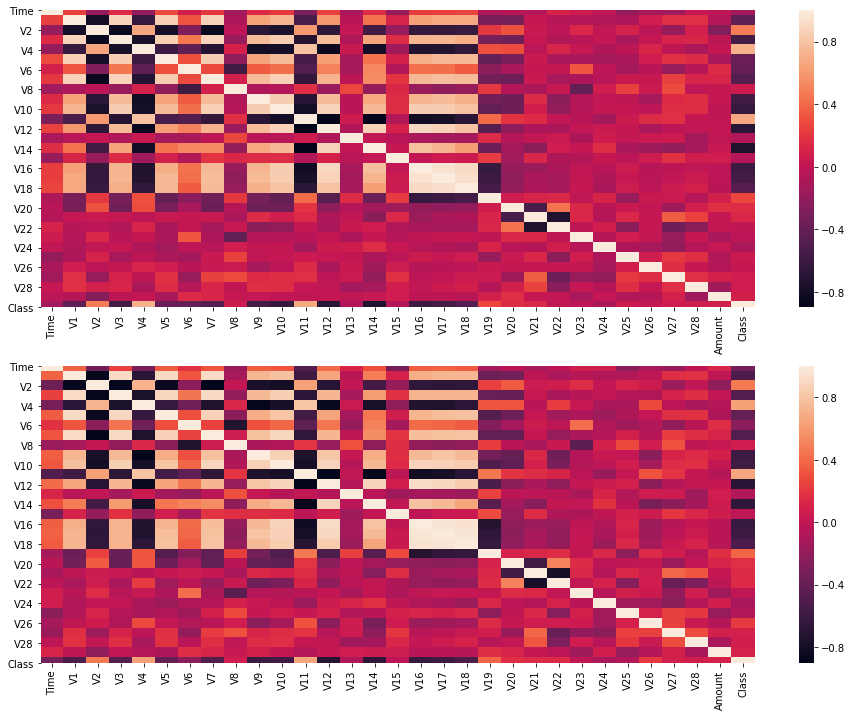

In [22]:
palette = sns.color_palette()
sampling = {"RandomUnderSampling" : df_ran_und, "Nearmiss": df_nearmiss}

f, ax = plt.subplots(2,1, figsize=(16,12))
i = 0
for sample, df in sampling.items():
    print(f"Correlation heatmap for {sample}")
    corr = df.corr()
    sns.heatmap(data=corr, ax=ax[i])
    i += 1
    print("-"*50)


* **La CorrelationHeatmap est la même selon la technique**


### Feature Selection

## Feature selection process 
* **Variance Threshold**
* **Chi 2 test**
* **Correlation Analysis (undersampled)**  

In [23]:
print(len(X)) # Entire dataset ! 

284807


In [24]:
#Variance threshold (WHOLD DS)
threshold = 0.2
selector = VarianceThreshold(threshold)
selected_col = selector.fit_transform(X)
selected_col = selector.get_support(indices=True)
unselected_col = [x for x in df.columns if x not in df.columns[selected_col] and x != "Class"]
print(f"Variable with a variance lower than {threshold * 100}% : {unselected_col}")

Variable with a variance lower than 20.0% : ['Time', 'V27', 'V28', 'Amount']


In [26]:
#chi 2 (WHOLD DS)

#We keep X_best on the side
selector = SelectKBest(score_func=f_classif)
selector.fit_transform(X,y)
print(f"Selected Feature ANOVA: {X.columns[selector.get_support()]}")
print("-"*20)
# mutual_info_classif : depence between X and y
selector = SelectKBest(score_func=mutual_info_classif)
selector.fit(X,y)
print(f"After mutal_info test : {X.columns[selector.get_support()]} ")

Selected Feature ANOVA: Index(['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18'], dtype='object')
--------------------
After mutal_info test : Index(['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18'], dtype='object') 


In [27]:
#We are keeping after the statistic tests ! 
features = X.columns[selector.get_support()]
new_X = X[features]

Size after Neamiss : 984


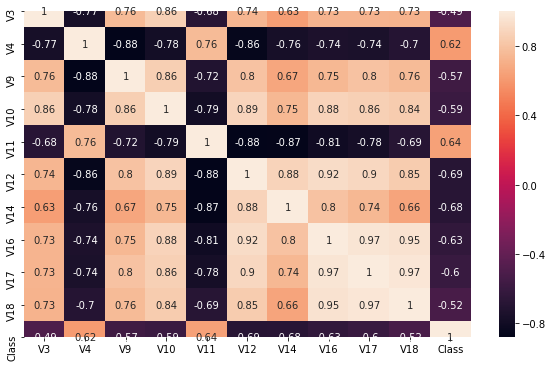

In [28]:
#As random undersampling and Nearmiss lead to the same correlation Heatmap 
# let's check the correlatio, heatmap using nearmiss 
palette = sns.color_palette()
fig = plt.figure(figsize=(10,6))
nearmiss = NearMiss()
new_X_under, new_y_under = nearmiss.fit_resample(new_X, y)

new_df_under = pd.concat([new_X_under, new_y_under], axis=1)
print(f"Size after Neamiss : {len(new_df_under)}")
corr = new_df_under.corr() 
#correlation after feature selection using statistic tests
sns.heatmap(corr, annot=True)

In [29]:
# selecting top 3 postively and negatively correlated features 

#Number of features to select
n = 4

pos_feat = corr["Class"].nlargest(n=n+2).drop("Class").index
print(f"{pos_feat} : pos")
neg_feat = corr["Class"].sort_values(ascending=True)[:n].index
print(f"{neg_feat} : neg")

Index(['V11', 'V4', 'V3', 'V18', 'V9'], dtype='object') : pos
Index(['V12', 'V14', 'V16', 'V17'], dtype='object') : neg


### Let's visualize the impact of these features on Class

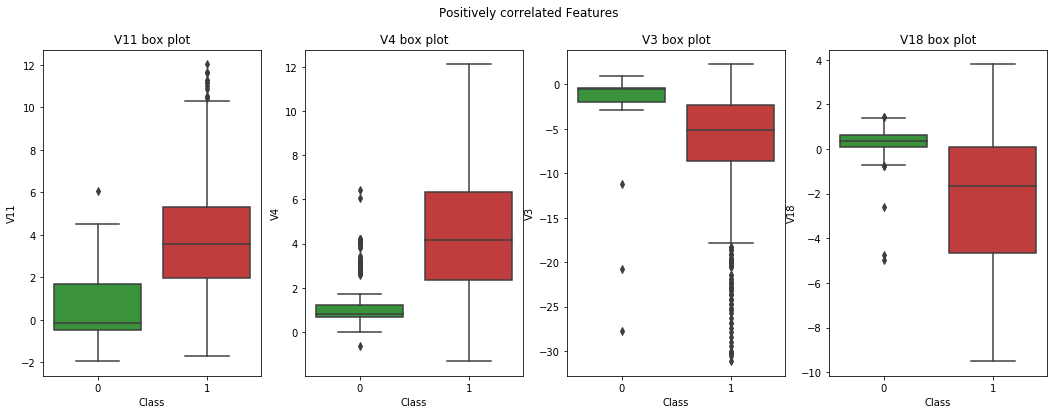

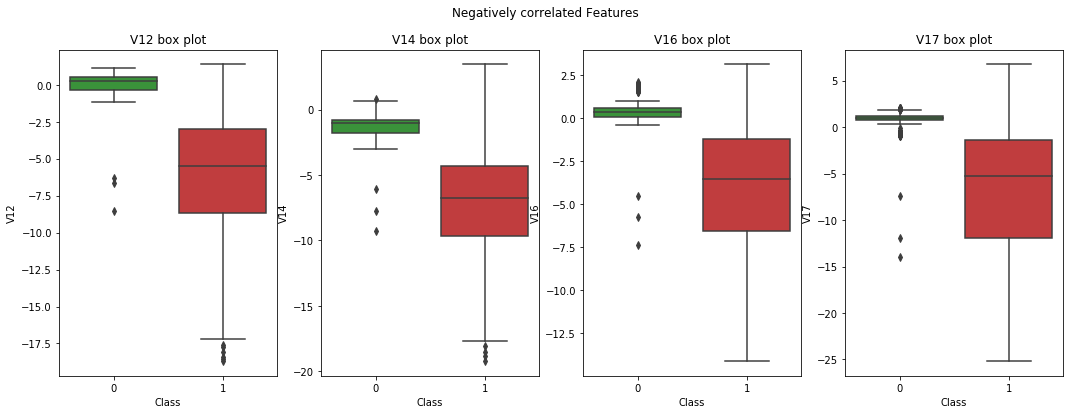

In [30]:
f, ax = plt.subplots(1,4, figsize=(18,6))
plt.suptitle("Positively correlated Features")
for i in range(4): 
    sns.boxplot(x="Class", y=pos_feat[i], data=new_df_under, palette=[palette[2], palette[3]], ax=ax[i])
    ax[i].set_title(f"{pos_feat[i]} box plot")
plt.show()

f, ax = plt.subplots(1,4, figsize=(18,6))
plt.suptitle("Negatively correlated Features")
for i in range(4): 
    sns.boxplot(x="Class", y=neg_feat[i], data=new_df_under, palette=[palette[2], palette[3]], ax=ax[i])
    ax[i].set_title(f"{neg_feat[i]} box plot")

### 'V3' has a lot of outliers. We will train the model without and and compare by replacing V3 by a relevant feature

In [31]:
feature_set = {
    #selected from stat tests (whole dataset) + correlation (undersampled)
    "feat_1" : ["V11", "V4", "V18", "V12", "V14", "V16", "V17"]
}

## Classifiers (training on undersampled dataset)

In [32]:
X = df[[col for col in df.columns if col != "Class"]] 
y = df["Class"]

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size)

In [33]:
#Classifiers 

classifiers = {
    "LogisticRegression" : LogisticRegression(n_jobs=-1, max_iter=400), 
    "SVC" : SVC(), 
    "KNN" : KNeighborsClassifier(n_jobs=-1), 
    "RandomForest" : RandomForestClassifier(n_jobs=-1)
}

parameters = {
    "LogisticRegression" : {"penalty" : ['l2'], "C":[0.001, 0.01, 0.1, 1, 10, 100, 1000], "solver" : ['newton-cg']}, 
    "SVC" : {"C":[0.001, 0.01, 0.1, 1, 10, 100, 1000]}, 
    "KNN" : {"n_neighbors": [int(x) for x in np.linspace(1,20,20)]}, 
    "RandomForest" : {"n_estimators": [int(x) for x in np.linspace(200,2000,10)], "max_depth" : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]}
}

In [34]:
# grid search

best_estimators = {"LogisticRegression" : None, "SVC": None, "KNN" : None, "RandomForest" : None}

for clf_name, clf in classifiers.items(): 
    print(f"Running GridSearchCV on {clf_name} ...")
    grid_clf = GridSearchCV(clf, parameters[clf_name], n_jobs=-1)
    grid_clf.fit(X_train,y_train)
    best_estimators[clf_name] = grid_clf.best_estimator_
    print(f"Best estimator : {best_estimators[clf_name]}")
    print("serializing ... \n")
    #serializing
    with open(f"{clf_name}_GRIDSEARCH_V0.pickle", "wb") as f: 
        pickle.dump({clf_name : grid_clf.best_estimator_}, f)
    print("-"*50)

Running GridSearchCV on LogisticRegression ...
Best estimator : LogisticRegression(C=100, max_iter=400, n_jobs=-1, solver='newton-cg')
serializing ... 

--------------------------------------------------
Running GridSearchCV on SVC ...
Best estimator : SVC(C=100)
serializing ... 

--------------------------------------------------
Running GridSearchCV on KNN ...
Best estimator : KNeighborsClassifier(n_jobs=-1, n_neighbors=3)
serializing ... 

--------------------------------------------------
Running GridSearchCV on RandomForest ...
Best estimator : RandomForestClassifier(max_depth=10, n_estimators=1200, n_jobs=-1)
serializing ... 

--------------------------------------------------


787
